In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_csv('winequality-red.csv')

X = data.drop(columns=['alcohol'])
y = data['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared value: {r_squared}')

R-squared value: 0.7228300454815514


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_csv('winequality-red.csv')

X = data.drop(columns=['alcohol'])
y = data['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared value for polynomial regression: {r_squared}')

R-squared value for polynomial regression: 0.7267408263459169


In [31]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
ypred = lin_reg.predict(X_test)
print("The predictied values are\n ", y_pred)

The predictied values are
  [ 9.63788684  9.77222608 10.26325207  9.54751378 10.74440741  9.5301977
  9.5600912  10.17915411 10.14541036 10.93237558 11.07607759 10.13552979
 10.06622013  9.61601546 10.19987242 12.5814254   9.77218313 10.29968771
 11.59854031  9.98460257 11.07226481  9.68973511 11.99589285 12.35186178
 10.26920218  9.91767868 11.44933105 10.70279085  9.97767148 10.87788164
  9.71874021 10.21992005  9.35565942  9.95546831  9.78331503  9.63115961
 12.1280965  10.83786137  9.83610439 11.73272521 10.16207581  9.58398174
 10.38268305  9.81707225  9.90275918 10.64517522 10.46749275  9.72645928
 10.10302205 10.61956065  9.94281952  9.2068551  10.80807223 12.70850974
  9.67691151  9.06115395 11.45817811 10.4440383  10.88245955  9.91557025
  9.5388327  10.72452269  9.7067499  10.38878688 11.63577805  9.65273194
 12.10204698  9.31564782 10.86772245  9.60025638 12.30622244  9.72031198
  9.8180982  11.01675826 11.86876013  9.8460762  14.1795397  10.07068681
 11.91667767 11.97530238

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(y_test, y_pred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(y_test,y_pred)))
print()
print('Variance Score:\t',explained_variance_score (y_test,y_pred))
print()
print('R_Square: \t', r2_score(y_test,y_pred))

Mean Squared Error: 	 0.34018803069622716

RMSE: 	 0.5832564021905179

Variance Score:	 0.726742062354737

R_Square: 	 0.7267408263459169


# Predicting Housing Prices with Regularized Regression

You work for a real estate analytics firm, and your task is to build a predictive model to estimate house prices 
based on various features. You have a dataset containing information about houses, such as square footage, 
number of bedrooms, number of bathrooms, and other relevant attributes. In this case study, you'll explore the application 
of Lasso and Ridge regression to improve the predictive performance of the model:

# 1. Data Preparation:

a. Load the dataset using pandas.

b. Explore and clean the data. Handle missing values and outliers.

c. Split the dataset into training and testing sets.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data=pd.read_csv('Modified_Housing.csv')
print(data.head(20))

       price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0   13300000   7420         4          2        3         1          0   
1   12250000   8960         4          4        4         1          0   
2   12250000   9960         3          2        2         1          0   
3   12215000   7500         4          2        2         1          0   
4   11410000   7420         4          1        2         1          1   
5   10850000   7500         3          3        1         1          0   
6   10150000   8580         4          3        4         1          0   
7   10150000  16200         5          3        2         1          0   
8    9870000   8100         4          1        2         1          1   
9    9800000   5750         3          2        4         1          1   
10   9800000  13200         3          1        2         1          0   
11   9681000   6000         4          3        2         1          1   
12   9310000   6550         4         

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>],
       [<Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>],
       [<Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>]], dtype=object)

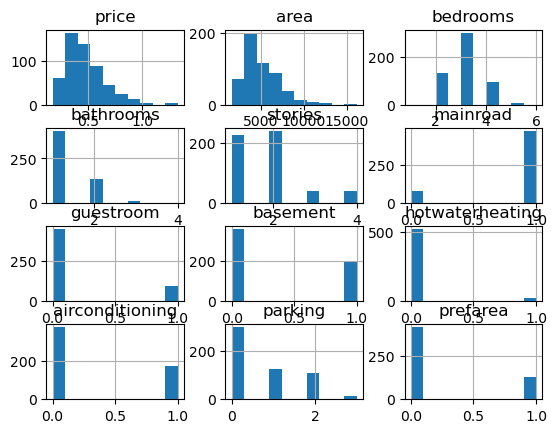

In [26]:
data.hist()

In [27]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [28]:
X = data.drop('price', axis=1)  # Replace 'target_column_name' with the name of your target column
y = data['price']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print("Training data shape (X_train):", X_train.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Testing target shape (y_test):", y_test.shape)

Training data shape (X_train): (436, 11)
Training target shape (y_train): (436,)
Testing data shape (X_test): (109, 11)
Testing target shape (y_test): (109,)


In [31]:
print("Training data samples:")
print(X_train.head())

print("Testing data samples:")
print(X_test.head())

print("Training target samples:")
print(y_train.head())

print("Testing target samples:")
print(y_test.head())

Training data samples:
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
46   6000         3          2        4         1          0         0   
93   7200         3          2        1         1          0         1   
335  3816         2          1        1         1          0         1   
412  2610         3          1        2         1          0         1   
471  3750         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  
46                 0                1        1         0  
93                 0                1        3         0  
335                0                1        2         0  
412                0                0        0         1  
471                0                0        0         0  
Testing data samples:
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
316  5900         4          2        2         0          0         1   
77   650

# base Linear regression Model

In [34]:
from sklearn.metrics import explained_variance_score
model_M = LinearRegression()

# Fit the model to the training data
model_M.fit(X_train, y_train)

# Predict house prices for the testing data
y_pred_M = model_M.predict(X_test)

mse = mean_squared_error(y_test, y_pred_M)
r2 = r2_score(y_test, y_pred_M)
rmse=np.sqrt(mean_squared_error(y_test, y_pred_M))
Variance_score=explained_variance_score(y_test, y_pred_M)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2*100,"%")

print("root-Mean Squared Error:", rmse)
print("Variance_score:", Variance_score*100,"%")

Mean Squared Error: 1800793719718.9668
R-squared (R2) Score: 64.37296086614117 %
root-Mean Squared Error: 1341936.5557726517
Variance_score: 64.68937580635941 %


In [35]:
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
Variance_score=explained_variance_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2*100,"%")

print("root-Mean Squared Error:", rmse)
print("Variance_score:", Variance_score*100,"%")

Mean Squared Error: 1800793754732.0046
R-squared (R2) Score: 64.37296017344059 %
root-Mean Squared Error: 1341936.5688183643
Variance_score: 64.6893751121395 %


In [36]:
coeff=lasso_model.coef_
intersept= lasso_model.intercept_
print("slope (m): ",coeff)
print("constant (c): ",intersept)

slope (m):  [2.37710520e+02 7.84836426e+04 1.10932611e+06 4.26909557e+05
 4.12677679e+05 2.43606396e+05 4.35005489e+05 7.12264425e+05
 8.08415380e+05 2.47443134e+05 6.36787651e+05]
constant (c):  -72427.44475468341


# Lasso Model

In [37]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

lasso_model = Lasso(alpha=0.00001)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
Variance_score=explained_variance_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2*100,"%")

print("root-Mean Squared Error:", rmse)
print("Variance_score:", Variance_score*100,"%")

Mean Squared Error: 1800793719753.9854
R-squared (R2) Score: 64.37296086544836 %
root-Mean Squared Error: 1341936.5557856993
Variance_score: 64.68937580566507 %


# Ridge Model

In [38]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

Ridge_model = Ridge(alpha=0.01)
Ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = Ridge_model.predict(X_test)

print("Training score: ", Ridge_model.score(X_train, y_train)*100,"%")
print()
print("Training score: ", Ridge_model.score(X_test, y_test)*100,"%")
print()
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
Variance_score=explained_variance_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2*100,"%")

print("root-Mean Squared Error:", rmse)
print("Variance_score:", Variance_score*100,"%")

Training score:  67.81204298905215 %

Training score:  64.37243921861099 %

Mean Squared Error: 1800820086759.8176
R-squared (R2) Score: 64.37243921861099 %
root-Mean Squared Error: 1341946.3799868524
Variance_score: 64.68888111651599 %


# Diagnosing and Remedying Heteroscedasticity and Multicollinearity

You are working as a data analyst for a company that aims to predict employee performance based on various 
factors such as experience, education level, and the number of projects completed. You've built a linear 
regression model, but you suspect it may be suffering from issues related to heteroscedasticity and multicollinearity.
Your task is to diagnose and address these problems:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Uncleaned_employees_final_dataset.csv')
print(data.head(10))

   employee_id         department     region        education gender  \
0         8724         Technology  region_26        Bachelors      m   
1        74430                 HR   region_4        Bachelors      f   
2        72255  Sales & Marketing  region_13        Bachelors      m   
3        38562        Procurement   region_2        Bachelors      f   
4        64486            Finance  region_29        Bachelors      m   
5        46232        Procurement   region_7        Bachelors      m   
6        54542            Finance   region_2        Bachelors      m   
7        67269          Analytics  region_22        Bachelors      m   
8        66174         Technology   region_7  Masters & above      m   
9        76303         Technology  region_22        Bachelors      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   


In [4]:
from sklearn.preprocessing import LabelEncoder
data.dropna(inplace=True)
# Encode categorical variables
label_encoder = LabelEncoder()
data['department'] = label_encoder.fit_transform(data['department'])
data['region'] = label_encoder.fit_transform(data['region'])
data['education'] = label_encoder.fit_transform(data['education'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['recruitment_channel'] = label_encoder.fit_transform(data['recruitment_channel'])

# cleaning data to the numerical value
print(data.head(10)['department'])
print(data.head(10)['region'])
print(data.head(10)['education'])
print(data.head(10)['gender'])
print(data.head(10)['recruitment_channel'])

1     2
2     7
3     5
4     1
5     5
6     1
7     0
8     8
9     8
10    7
Name: department, dtype: int32
1     28
2      4
3     11
4     21
5     31
6     11
7     14
8     31
9     14
10     7
Name: region, dtype: int32
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     2
9     0
10    0
Name: education, dtype: int32
1     0
2     1
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: gender, dtype: int32
1     0
2     0
3     0
4     2
5     2
6     0
7     2
8     0
9     2
10    2
Name: recruitment_channel, dtype: int32


In [5]:
from sklearn.model_selection import train_test_split

X = data.drop('avg_training_score', axis=1)
y = data['avg_training_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(data.head(10),X_train)
print('********************')
print(data.head(10),X_test)
print('********************')
print(data.head(10),y_train)
print('********************')
print(data.head(10),y_test)
#print(X_train)
#print(X_test)
# Build and train a Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions
y_pred = lin_model.predict(X_test)



print("Training score: ", lin_model.score(X_train, y_train)*100,"%")
print()
print("Training score: ", lin_model.score(X_test, y_test)*100,"%")
print()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
Variance_score=explained_variance_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2*100,"%")

print("root-Mean Squared Error:", rmse)
print("Variance_score:", Variance_score*100,"%")

    employee_id  department  region  education  gender  recruitment_channel  \
1         74430           2      28          0       0                    0   
2         72255           7       4          0       1                    0   
3         38562           5      11          0       0                    0   
4         64486           1      21          0       1                    2   
5         46232           5      31          0       1                    2   
6         54542           1      11          0       1                    0   
7         67269           0      14          0       1                    2   
8         66174           8      31          2       1                    0   
9         76303           8      14          0       1                    2   
10        60245           7       7          0       1                    2   

    no_of_trainings  age  previous_year_rating  length_of_service  \
1                 1   31                   3.0               

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score


X = data.drop('avg_training_score', axis=1)
y = data['avg_training_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#print(X_train)
#print(X_test)
# Build and train a Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions
y_pred = lin_model.predict(X_test)



print("Training score: ", lin_model.score(X_train, y_train)*100,"%")
print()
print("Testing score: ", lin_model.score(X_test, y_test)*100,"%")
print()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
Variance_score=explained_variance_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2*100,"%")

print("root-Mean Squared Error:", rmse)
print("Variance_score:", Variance_score*100,"%")

Training score:  6.869241678685112 %

Testing score:  8.566286055857598 %

Mean Squared Error: 164.7170375296992
R-squared (R2) Score: 8.566286055857598 %
root-Mean Squared Error: 12.834213553221685
Variance_score: 8.56632721403452 %
